# Importing Necessary Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Data Reading

In [ ]:
player_career_df = pd.read_csv('https://raw.githubusercontent.com/richard2323233/schulich_data_science/main/player_career_info.csv')
player_game_df = pd.read_csv('https://raw.githubusercontent.com/richard2323233/schulich_data_science/main/player_per_game.csv')
player_shooting_df = pd.read_csv('https://raw.githubusercontent.com/richard2323233/schulich_data_science/main/player_shooting.csv')

In [ ]:
player_career_df.head(10)

,player_id,player,birth_year,hof,num_seasons,first_seas,last_seas
0,1,Al Brightman,NaN,False,1,1947,1947
1,2,Al Lujack,NaN,False,1,1947,1947
2,3,Al Negratti,NaN,False,1,1947,1947
3,4,Angelo Musi,NaN,False,3,1947,1949
4,5,Ariel Maughan,1923.0,False,5,1947,1951
5,6,Armand Cure,NaN,False,1,1947,1947
6,7,Art Hillhouse,NaN,False,2,1947,1948
7,8,Art Spector,1920.0,False,4,1947,1950
8,9,Art Stolkey,NaN,False,1,1947,1947
9,10,Aubrey Davis,NaN,False,1,1947,1947


In [ ]:
player_game_df.head(10)

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,31136,2024,5025,A.J. Green,NaN,SG,24.0,2,NBA,MIL,...,0.895,0.2,1.0,1.1,0.5,0.2,0.1,0.2,0.9,4.5
1,31137,2024,5026,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,...,0.652,0.3,0.9,1.2,0.5,0.2,0.1,0.3,0.5,3.2
2,31138,2024,5027,AJ Griffin,NaN,SF,20.0,2,NBA,ATL,...,1.000,0.1,0.8,0.9,0.3,0.1,0.1,0.4,0.3,2.4
3,31139,2024,4219,Aaron Gordon,NaN,PF,28.0,10,NBA,DEN,...,0.658,2.4,4.1,6.5,3.5,0.8,0.6,1.4,1.9,13.9
4,31140,2024,4582,Aaron Holiday,NaN,PG,27.0,6,NBA,HOU,...,0.921,0.3,1.3,1.6,1.8,0.5,0.1,0.7,1.6,6.6
5,31141,2024,4805,Aaron Nesmith,NaN,SF,24.0,4,NBA,IND,...,0.781,0.9,2.9,3.8,1.5,0.9,0.7,0.9,3.3,12.2
6,31142,2024,4900,Aaron Wiggins,NaN,SG,25.0,3,NBA,OKC,...,0.789,0.8,1.6,2.4,1.1,0.7,0.2,0.7,1.2,6.9
7,31143,2024,5109,Adam Flagler,NaN,SG,24.0,1,NBA,OKC,...,NaN,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.5
8,31144,2024,5110,Adama Sanogo,NaN,PF,21.0,1,NBA,CHI,...,0.667,2.1,1.9,4.0,0.0,0.1,0.0,0.6,0.6,4.0
9,31145,2024,4688,Admiral Schofield,NaN,PF,26.0,4,NBA,ORL,...,0.000,0.1,0.6,0.7,0.3,0.0,0.0,0.2,0.4,1.1


In [ ]:
player_shooting_df.head(10)

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,fg_percent_from_x16_3p_range,fg_percent_from_x3p_range,percent_assisted_x2p_fg,percent_assisted_x3p_fg,percent_dunks_of_fga,num_of_dunks,percent_corner_3s_of_3pa,corner_3_point_percent,num_heaves_attempted,num_heaves_made
0,31136,2024,5025,A.J. Green,NaN,SG,24,2,NBA,MIL,...,0.500,0.408,0.857,0.942,0.000,0,0.225,0.447,0,0
1,31137,2024,5026,A.J. Lawson,NaN,SG,23,2,NBA,DAL,...,0.500,0.260,0.610,1.000,0.107,12,0.640,0.250,0,0
2,31138,2024,5027,AJ Griffin,NaN,SF,20,2,NBA,ATL,...,0.250,0.256,0.750,0.800,0.016,1,0.205,0.250,0,0
3,31139,2024,4219,Aaron Gordon,NaN,PF,28,10,NBA,DEN,...,0.417,0.290,0.642,0.850,0.256,171,0.391,0.352,1,0
4,31140,2024,4582,Aaron Holiday,NaN,PG,27,6,NBA,HOU,...,0.350,0.387,0.255,0.810,0.005,2,0.212,0.478,1,0
5,31141,2024,4805,Aaron Nesmith,NaN,SF,24,4,NBA,IND,...,0.667,0.419,0.697,0.986,0.052,31,0.419,0.436,0,0
6,31142,2024,4900,Aaron Wiggins,NaN,SG,25,3,NBA,OKC,...,0.000,0.492,0.667,0.968,0.042,12,0.413,0.404,0,0
7,31143,2024,5109,Adam Flagler,NaN,SG,24,1,NBA,OKC,...,NaN,0.167,NaN,0.000,0.000,0,0.000,NaN,0,0
8,31144,2024,5110,Adama Sanogo,NaN,PF,21,1,NBA,CHI,...,NaN,NaN,0.500,NaN,0.000,0,NaN,NaN,0,0
9,31145,2024,4688,Admiral Schofield,NaN,PF,26,4,NBA,ORL,...,0.500,0.375,0.500,1.000,0.154,2,0.250,0.500,0,0


# Data Merging

In [ ]:
# Common player_id column so join all 3 dataframes on id column
player_career_df.set_index('player_id', inplace = True)
player_game_df.set_index('player_id', inplace = True)
player_shooting_df.set_index('player_id', inplace = True)

In [ ]:
nba_player_df = player_game_df.join(player_shooting_df, lsuffix= '_player', rsuffix= '_athlete').join(player_career_df)

In [ ]:
nba_player_df.head(10)

,seas_id_player,season_player,player_player,birth_year_player,pos_player,age_player,experience_player,lg_player,tm_player,g_player,...,percent_corner_3s_of_3pa,corner_3_point_percent,num_heaves_attempted,num_heaves_made,player,birth_year,hof,num_seasons,first_seas,last_seas
player_id,,,,,,,,,,,,,,,,,,,,,
1,1,1947,Al Brightman,NaN,F,23.0,1,BAA,BOS,58,...,NaN,NaN,NaN,NaN,Al Brightman,NaN,False,1,1947,1947
2,2,1947,Al Lujack,NaN,F,26.0,1,BAA,WSC,5,...,NaN,NaN,NaN,NaN,Al Lujack,NaN,False,1,1947,1947
3,3,1947,Al Negratti,NaN,F-C,25.0,1,BAA,WSC,11,...,NaN,NaN,NaN,NaN,Al Negratti,NaN,False,1,1947,1947
4,344,1949,Angelo Musi,NaN,G,30.0,3,BAA,PHW,58,...,NaN,NaN,NaN,NaN,Angelo Musi,NaN,False,3,1947,1949
4,206,1948,Angelo Musi,NaN,G,29.0,2,BAA,PHW,43,...,NaN,NaN,NaN,NaN,Angelo Musi,NaN,False,3,1947,1949
4,4,1947,Angelo Musi,NaN,G,28.0,1,BAA,PHW,60,...,NaN,NaN,NaN,NaN,Angelo Musi,NaN,False,3,1947,1949
5,901,1951,Ariel Maughan,1923.0,F,27.0,5,NBA,WSC,35,...,NaN,NaN,NaN,NaN,Ariel Maughan,1923.0,False,5,1947,1951
5,594,1950,Ariel Maughan,1923.0,F,26.0,4,NBA,STB,68,...,NaN,NaN,NaN,NaN,Ariel Maughan,1923.0,False,5,1947,1951
5,345,1949,Ariel Maughan,1923.0,F,25.0,3,BAA,STB,55,...,NaN,NaN,NaN,NaN,Ariel Maughan,1923.0,False,5,1947,1951


In [ ]:
nba_player_df.columns

Index(['seas_id_player', 'season_player', 'player_player', 'birth_year_player',
       'pos_player', 'age_player', 'experience_player', 'lg_player',
       'tm_player', 'g_player', 'gs', 'mp_per_game', 'fg_per_game',
       'fga_per_game', 'fg_percent_player', 'x3p_per_game', 'x3pa_per_game',
       'x3p_percent', 'x2p_per_game', 'x2pa_per_game', 'x2p_percent',
       'e_fg_percent', 'ft_per_game', 'fta_per_game', 'ft_percent',
       'orb_per_game', 'drb_per_game', 'trb_per_game', 'ast_per_game',
       'stl_per_game', 'blk_per_game', 'tov_per_game', 'pf_per_game',
       'pts_per_game', 'seas_id_athlete', 'season_athlete', 'player_athlete',
       'birth_year_athlete', 'pos_athlete', 'age_athlete',
       'experience_athlete', 'lg_athlete', 'tm_athlete', 'g_athlete', 'mp',
       'fg_percent_athlete', 'avg_dist_fga', 'percent_fga_from_x2p_range',
       'percent_fga_from_x0_3_range', 'percent_fga_from_x3_10_range',
       'percent_fga_from_x10_16_range', 'percent_fga_from_x16_3p_rang

# Data Cleaning and Preparation

In [ ]:
nba_player_df = nba_player_df[['seas_id_player', 'season_player', 'player_player',
    'birth_year_player', 'pos_player', 'age_player', 'experience_player', 'lg_player', 'tm_player',
    'g_player', 'gs', 'mp_per_game', 'fg_per_game', 'fga_per_game', 'fg_percent_player',
    'x3p_per_game', 'x3pa_per_game', 'x3p_percent', 'x2p_per_game', 'x2pa_per_game', 'x2p_percent',
    'e_fg_percent', 'ft_per_game', 'fta_per_game', 'ft_percent', 'orb_per_game', 'drb_per_game',
    'trb_per_game', 'ast_per_game', 'stl_per_game', 'blk_per_game', 'tov_per_game', 'pf_per_game',
    'pts_per_game', 'avg_dist_fga', 'percent_fga_from_x2p_range','percent_fga_from_x3p_range',
    'fg_percent_from_x2p_range', 'fg_percent_from_x3p_range', 'percent_assisted_x2p_fg', 'percent_assisted_x3p_fg',
    'percent_dunks_of_fga', 'num_of_dunks', 'corner_3_point_percent', 'num_heaves_attempted', 'num_heaves_made',
    'hof', 'num_seasons', 'first_seas', 'last_seas']]

In [ ]:
nba_player_df['seas_id_player'].count()

209198

In [ ]:
nba_player_df.duplicated().sum()

398

In [ ]:
nba_player_df.isnull().sum()

seas_id_player                     0
season_player                      0
player_player                      0
birth_year_player             204532
pos_player                         0
age_player                        22
experience_player                  0
lg_player                          0
tm_player                          0
g_player                           0
gs                              8639
mp_per_game                     1083
fg_per_game                        0
fga_per_game                       0
fg_percent_player                713
x3p_per_game                    6352
x3pa_per_game                   6352
x3p_percent                    31501
x2p_per_game                       0
x2pa_per_game                      0
x2p_percent                     1143
e_fg_percent                     713
ft_per_game                        0
fta_per_game                       0
ft_percent                      6176
orb_per_game                    4657
drb_per_game                    4657
t

In [ ]:
# Drop Duplicate values
nba_player_df.drop_duplicates()


,seas_id_player,season_player,player_player,birth_year_player,pos_player,age_player,experience_player,lg_player,tm_player,g_player,...,percent_assisted_x3p_fg,percent_dunks_of_fga,num_of_dunks,corner_3_point_percent,num_heaves_attempted,num_heaves_made,hof,num_seasons,first_seas,last_seas
player_id,,,,,,,,,,,,,,,,,,,,,
1,1,1947,Al Brightman,NaN,F,23.0,1,BAA,BOS,58,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1947,1947
2,2,1947,Al Lujack,NaN,F,26.0,1,BAA,WSC,5,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1947,1947
3,3,1947,Al Negratti,NaN,F-C,25.0,1,BAA,WSC,11,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1947,1947
4,344,1949,Angelo Musi,NaN,G,30.0,3,BAA,PHW,58,...,NaN,NaN,NaN,NaN,NaN,NaN,False,3,1947,1949
4,206,1948,Angelo Musi,NaN,G,29.0,2,BAA,PHW,43,...,NaN,NaN,NaN,NaN,NaN,NaN,False,3,1947,1949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5208,31848,2024,Vasilije Micić,NaN,PG,30.0,1,NBA,OKC,30,...,0.531,0.000,0.0,0.286,0.0,0.0,False,1,2024,2024
5208,31849,2024,Vasilije Micić,NaN,PG,30.0,1,NBA,CHO,30,...,0.605,0.003,1.0,0.154,0.0,0.0,False,1,2024,2024
5208,31849,2024,Vasilije Micić,NaN,PG,30.0,1,NBA,CHO,30,...,0.818,0.011,1.0,0.000,0.0,0.0,False,1,2024,2024


In [ ]:
# Reset index of nba dataframe
nba_player_df.reset_index(inplace = True)

In [ ]:
nba_player_df.describe()

,player_id,seas_id_player,season_player,birth_year_player,age_player,experience_player,g_player,gs,mp_per_game,fg_per_game,...,percent_assisted_x2p_fg,percent_assisted_x3p_fg,percent_dunks_of_fga,num_of_dunks,corner_3_point_percent,num_heaves_attempted,num_heaves_made,num_seasons,first_seas,last_seas
count,209198.000000,209198.000000,209198.000000,4666.000000,209176.000000,209198.000000,209198.000000,200559.000000,208115.000000,209198.000000,...,193502.000000,147197.000000,195904.000000,196607.000000,147799.000000,196607.000000,196607.000000,209198.000000,209198.000000,209198.000000
mean,3380.220566,21681.056028,2007.770782,1956.597085,27.245879,6.351151,50.873182,26.828589,22.056526,3.432770,...,0.544795,0.854989,0.053632,18.485237,0.349112,0.819935,0.022141,11.239486,2002.306552,2012.823277
std,810.883245,6261.215711,12.372710,20.354756,4.252197,4.141632,25.154228,28.889252,9.822181,2.251468,...,0.201828,0.185743,0.077057,30.339935,0.191797,1.465904,0.154197,4.420665,11.992137,12.048772
min,1.000000,1.000000,1947.000000,1914.000000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1947.000000,1947.000000
25%,2967.000000,18001.000000,2002.000000,1944.000000,24.000000,3.000000,29.000000,1.000000,14.200000,1.700000,...,0.404000,0.786000,0.002000,0.000000,0.269000,0.000000,0.000000,8.000000,1997.000000,2008.000000
50%,3437.000000,22239.000000,2010.000000,1952.000000,27.000000,6.000000,56.000000,14.000000,22.000000,3.000000,...,0.573000,0.921000,0.026000,6.000000,0.368000,0.000000,0.000000,12.000000,2004.000000,2015.000000
75%,3913.000000,26386.000000,2017.000000,1975.000000,30.000000,9.000000,74.000000,52.000000,30.300000,4.800000,...,0.688000,1.000000,0.072000,23.000000,0.444000,1.000000,0.000000,14.000000,2010.000000,2022.000000
max,5209.000000,31870.000000,2024.000000,2002.000000,46.000000,22.000000,90.000000,83.000000,48.500000,20.000000,...,1.000000,1.000000,1.000000,306.000000,1.000000,18.000000,2.000000,22.000000,2024.000000,2024.000000


In [ ]:
# Renaming columns for better analysis and readability
nba_player_df.columns

Index(['player_id', 'seas_id_player', 'season_player', 'player_player',
       'birth_year_player', 'pos_player', 'age_player', 'experience_player',
       'lg_player', 'tm_player', 'g_player', 'gs', 'mp_per_game',
       'fg_per_game', 'fga_per_game', 'fg_percent_player', 'x3p_per_game',
       'x3pa_per_game', 'x3p_percent', 'x2p_per_game', 'x2pa_per_game',
       'x2p_percent', 'e_fg_percent', 'ft_per_game', 'fta_per_game',
       'ft_percent', 'orb_per_game', 'drb_per_game', 'trb_per_game',
       'ast_per_game', 'stl_per_game', 'blk_per_game', 'tov_per_game',
       'pf_per_game', 'pts_per_game', 'avg_dist_fga',
       'percent_fga_from_x2p_range', 'percent_fga_from_x3p_range',
       'fg_percent_from_x2p_range', 'fg_percent_from_x3p_range',
       'percent_assisted_x2p_fg', 'percent_assisted_x3p_fg',
       'percent_dunks_of_fga', 'num_of_dunks', 'corner_3_point_percent',
       'num_heaves_attempted', 'num_heaves_made', 'hof', 'num_seasons',
       'first_seas', 'last_seas'],
  

In [ ]:
nba_column_name = {
    'player_id': 'player_id',
    'seas_id_player': 'season_id',
    'season_player': 'season',
    'player_player': 'player_name',
    'birth_year_player': 'birth_year',
    'pos_player': 'position',
    'age_player': 'age',
    'experience_player': 'experience',
    'lg_player': 'league',
    'tm_player': 'team',
    'g_player': 'games_played',
    'gs': 'games_started',
    'mp_per_game': 'mins_per_game',
    'fg_per_game': 'field_goals',
    'fga_per_game': 'field_goals_attempt',
    'fg_percent_player': 'field_goal_percent',
    'x3p_per_game': 'field_goals_3pt',
    'x3pa_per_game': 'attempts_3pt',
    'x3p_percent': 'percent_3pt',
    'x2p_per_game': 'field_goals_2pt',
    'x2pa_per_game': 'attempts_2pt',
    'x2p_percent': 'percent_2pt',
    'e_fg_percent': 'effective_field_goal_percent',
    'ft_per_game': 'free_throws',
    'fta_per_game': 'free_throws_attempt',
    'ft_percent': 'free_throws_percent',
    'orb_per_game': 'offensive_rebounds',
    'drb_per_game': 'defensive_rebounds',
    'trb_per_game': 'total_rebounds',
    'ast_per_game': 'assists',
    'stl_per_game': 'steals',
    'blk_per_game': 'blocks',
    'tov_per_game': 'turnovers',
    'pf_per_game': 'personal_fouls',
    'pts_per_game': 'points',
    'avg_dist_fga': 'average_shot_distance',
    'percent_fga_from_x2p_range': 'field_goal_attempts_percent_2pt_range',
    'percent_fga_from_x3p_range': 'field_goal_attempts_percent_3pt_range',
    'fg_percent_from_x2p_range': 'field_goal_percent_2pt_range',
    'fg_percent_from_x3p_range': 'field_goal_percent_3pt_range',
    'percent_assisted_x2p_fg': 'field_goal_assist_percent_2pt_range',
    'percent_assisted_x3p_fg': 'field_goal_assist_percent_3pt_range',
    'percent_dunks_of_fga': 'field_goal_attempts_dunk_percent',
    'num_of_dunks': 'num_of_dunks',
    'corner_3_point_percent': 'corner_3pt_percent',
    'num_heaves_attempted': 'num_heaves_attempted',
    'num_heaves_made': 'num_heaves_made',
    'hof': 'hall_of_fame_status',
    'num_seasons': 'num_seasons',
    'first_seas': 'first_season',
    'last_seas': 'last_season'
}

nba_player_df = nba_player_df.rename(columns = nba_column_name)

In [ ]:
nba_player_df

,player_id,season_id,season,player_name,birth_year,position,age,experience,league,team,...,field_goal_assist_percent_3pt_range,field_goal_attempts_dunk_percent,num_of_dunks,corner_3pt_percent,num_heaves_attempted,num_heaves_made,hall_of_fame_status,num_seasons,first_season,last_season
0,1,1,1947,Al Brightman,NaN,F,23.0,1,BAA,BOS,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1947,1947
1,2,2,1947,Al Lujack,NaN,F,26.0,1,BAA,WSC,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1947,1947
2,3,3,1947,Al Negratti,NaN,F-C,25.0,1,BAA,WSC,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1947,1947
3,4,344,1949,Angelo Musi,NaN,G,30.0,3,BAA,PHW,...,NaN,NaN,NaN,NaN,NaN,NaN,False,3,1947,1949
4,4,206,1948,Angelo Musi,NaN,G,29.0,2,BAA,PHW,...,NaN,NaN,NaN,NaN,NaN,NaN,False,3,1947,1949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209193,5208,31848,2024,Vasilije Micić,NaN,PG,30.0,1,NBA,OKC,...,0.531,0.000,0.0,0.286,0.0,0.0,False,1,2024,2024
209194,5208,31849,2024,Vasilije Micić,NaN,PG,30.0,1,NBA,CHO,...,0.605,0.003,1.0,0.154,0.0,0.0,False,1,2024,2024
209195,5208,31849,2024,Vasilije Micić,NaN,PG,30.0,1,NBA,CHO,...,0.818,0.011,1.0,0.000,0.0,0.0,False,1,2024,2024
209196,5208,31849,2024,Vasilije Micić,NaN,PG,30.0,1,NBA,CHO,...,0.531,0.000,0.0,0.286,0.0,0.0,False,1,2024,2024


In [ ]:
nba_player_df.describe()

,player_id,season_id,season,birth_year,age,experience,games_played,games_started,mins_per_game,field_goals,...,field_goal_assist_percent_2pt_range,field_goal_assist_percent_3pt_range,field_goal_attempts_dunk_percent,num_of_dunks,corner_3pt_percent,num_heaves_attempted,num_heaves_made,num_seasons,first_season,last_season
count,209198.000000,209198.000000,209198.000000,4666.000000,209176.000000,209198.000000,209198.000000,200559.000000,208115.000000,209198.000000,...,193502.000000,147197.000000,195904.000000,196607.000000,147799.000000,196607.000000,196607.000000,209198.000000,209198.000000,209198.000000
mean,3380.220566,21681.056028,2007.770782,1956.597085,27.245879,6.351151,50.873182,26.828589,22.056526,3.432770,...,0.544795,0.854989,0.053632,18.485237,0.349112,0.819935,0.022141,11.239486,2002.306552,2012.823277
std,810.883245,6261.215711,12.372710,20.354756,4.252197,4.141632,25.154228,28.889252,9.822181,2.251468,...,0.201828,0.185743,0.077057,30.339935,0.191797,1.465904,0.154197,4.420665,11.992137,12.048772
min,1.000000,1.000000,1947.000000,1914.000000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1947.000000,1947.000000
25%,2967.000000,18001.000000,2002.000000,1944.000000,24.000000,3.000000,29.000000,1.000000,14.200000,1.700000,...,0.404000,0.786000,0.002000,0.000000,0.269000,0.000000,0.000000,8.000000,1997.000000,2008.000000
50%,3437.000000,22239.000000,2010.000000,1952.000000,27.000000,6.000000,56.000000,14.000000,22.000000,3.000000,...,0.573000,0.921000,0.026000,6.000000,0.368000,0.000000,0.000000,12.000000,2004.000000,2015.000000
75%,3913.000000,26386.000000,2017.000000,1975.000000,30.000000,9.000000,74.000000,52.000000,30.300000,4.800000,...,0.688000,1.000000,0.072000,23.000000,0.444000,1.000000,0.000000,14.000000,2010.000000,2022.000000
max,5209.000000,31870.000000,2024.000000,2002.000000,46.000000,22.000000,90.000000,83.000000,48.500000,20.000000,...,1.000000,1.000000,1.000000,306.000000,1.000000,18.000000,2.000000,22.000000,2024.000000,2024.000000


In [ ]:
# Filtering Dataset from year 2013-2024
# Analyzing dataset for the current years [2013-2024] 

nba_player_df = nba_player_df[nba_player_df['first_season'] >= 2013]
nba_player_df

,player_id,season_id,season,player_name,birth_year,position,age,experience,league,team,...,field_goal_assist_percent_3pt_range,field_goal_attempts_dunk_percent,num_of_dunks,corner_3pt_percent,num_heaves_attempted,num_heaves_made,hall_of_fame_status,num_seasons,first_season,last_season
170063,4063,25110,2015,Alexey Shved,NaN,SG,26.0,3,NBA,TOT,...,0.681,0.012,4.0,0.333,3.0,0.0,False,3,2013,2015
170064,4063,25110,2015,Alexey Shved,NaN,SG,26.0,3,NBA,TOT,...,0.647,0.015,2.0,0.400,2.0,0.0,False,3,2013,2015
170065,4063,25110,2015,Alexey Shved,NaN,SG,26.0,3,NBA,TOT,...,1.000,0.042,1.0,1.000,0.0,0.0,False,3,2013,2015
170066,4063,25110,2015,Alexey Shved,NaN,SG,26.0,3,NBA,TOT,...,0.654,0.006,1.0,0.000,1.0,0.0,False,3,2013,2015
170067,4063,25110,2015,Alexey Shved,NaN,SG,26.0,3,NBA,TOT,...,0.633,0.030,7.0,0.385,1.0,0.0,False,3,2013,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209193,5208,31848,2024,Vasilije Micić,NaN,PG,30.0,1,NBA,OKC,...,0.531,0.000,0.0,0.286,0.0,0.0,False,1,2024,2024
209194,5208,31849,2024,Vasilije Micić,NaN,PG,30.0,1,NBA,CHO,...,0.605,0.003,1.0,0.154,0.0,0.0,False,1,2024,2024
209195,5208,31849,2024,Vasilije Micić,NaN,PG,30.0,1,NBA,CHO,...,0.818,0.011,1.0,0.000,0.0,0.0,False,1,2024,2024
209196,5208,31849,2024,Vasilije Micić,NaN,PG,30.0,1,NBA,CHO,...,0.531,0.000,0.0,0.286,0.0,0.0,False,1,2024,2024


In [ ]:
# Checking for null/missing values
nan_columns = nba_player_df.columns[nba_player_df.isna().any()].to_list()
print(f'Columns with NaN values: {nan_columns}')

Columns with NaN values: ['birth_year', 'field_goal_percent', 'percent_3pt', 'percent_2pt', 'effective_field_goal_percent', 'free_throws_percent', 'average_shot_distance', 'field_goal_attempts_percent_2pt_range', 'field_goal_attempts_percent_3pt_range', 'field_goal_percent_2pt_range', 'field_goal_percent_3pt_range', 'field_goal_assist_percent_2pt_range', 'field_goal_assist_percent_3pt_range', 'field_goal_attempts_dunk_percent', 'corner_3pt_percent']


In [ ]:
nba_player_df[['birth_year', 'field_goal_percent', 'percent_3pt', 'percent_2pt', 'effective_field_goal_percent', 
               'free_throws_percent', 'average_shot_distance', 'field_goal_attempts_percent_2pt_range', 
               'field_goal_attempts_percent_3pt_range', 'field_goal_percent_2pt_range', 'field_goal_percent_3pt_range', 
               'field_goal_assist_percent_2pt_range', 'field_goal_assist_percent_3pt_range', 'field_goal_attempts_dunk_percent', 
               'corner_3pt_percent']].isna().sum()

birth_year                               39045
field_goal_percent                         242
percent_3pt                               2369
percent_2pt                                485
effective_field_goal_percent               242
free_throws_percent                       1868
average_shot_distance                      242
field_goal_attempts_percent_2pt_range      242
field_goal_attempts_percent_3pt_range      242
field_goal_percent_2pt_range               485
field_goal_percent_3pt_range              2369
field_goal_assist_percent_2pt_range       1059
field_goal_assist_percent_3pt_range       5391
field_goal_attempts_dunk_percent           242
corner_3pt_percent                        5409
dtype: int64

In [ ]:
# Apart from birth_yearall other columns will have NaN values
# The other columns having NaN values cannot be dropped 
# The reason is as the player might not have played/did not score points that game
# But that is still crucial information for the dataset

In [ ]:
missval_birth_year = round((39045/39135) * 100, 2)
print(f'Percent of birth year missing values: {missval_birth_year}')

Percent of birth year missing values: 99.77


In [ ]:
# Dropping birth_year column as almost all the values in the column are NaN values
nba_player_df = nba_player_df.drop(columns = 'birth_year') 

In [ ]:
nba_player_df

,player_id,season_id,season,player_name,position,age,experience,league,team,games_played,...,field_goal_assist_percent_3pt_range,field_goal_attempts_dunk_percent,num_of_dunks,corner_3pt_percent,num_heaves_attempted,num_heaves_made,hall_of_fame_status,num_seasons,first_season,last_season
170063,4063,25110,2015,Alexey Shved,SG,26.0,3,NBA,TOT,42,...,0.681,0.012,4.0,0.333,3.0,0.0,False,3,2013,2015
170064,4063,25110,2015,Alexey Shved,SG,26.0,3,NBA,TOT,42,...,0.647,0.015,2.0,0.400,2.0,0.0,False,3,2013,2015
170065,4063,25110,2015,Alexey Shved,SG,26.0,3,NBA,TOT,42,...,1.000,0.042,1.0,1.000,0.0,0.0,False,3,2013,2015
170066,4063,25110,2015,Alexey Shved,SG,26.0,3,NBA,TOT,42,...,0.654,0.006,1.0,0.000,1.0,0.0,False,3,2013,2015
170067,4063,25110,2015,Alexey Shved,SG,26.0,3,NBA,TOT,42,...,0.633,0.030,7.0,0.385,1.0,0.0,False,3,2013,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209193,5208,31848,2024,Vasilije Micić,PG,30.0,1,NBA,OKC,30,...,0.531,0.000,0.0,0.286,0.0,0.0,False,1,2024,2024
209194,5208,31849,2024,Vasilije Micić,PG,30.0,1,NBA,CHO,30,...,0.605,0.003,1.0,0.154,0.0,0.0,False,1,2024,2024
209195,5208,31849,2024,Vasilije Micić,PG,30.0,1,NBA,CHO,30,...,0.818,0.011,1.0,0.000,0.0,0.0,False,1,2024,2024
209196,5208,31849,2024,Vasilije Micić,PG,30.0,1,NBA,CHO,30,...,0.531,0.000,0.0,0.286,0.0,0.0,False,1,2024,2024


In [ ]:
nba_player_df[['field_goal_percent', 'percent_3pt', 'percent_2pt', 'effective_field_goal_percent', 
               'free_throws_percent', 'average_shot_distance', 'field_goal_attempts_percent_2pt_range', 
               'field_goal_attempts_percent_3pt_range', 'field_goal_percent_2pt_range', 'field_goal_percent_3pt_range', 
               'field_goal_assist_percent_2pt_range', 'field_goal_assist_percent_3pt_range', 'field_goal_attempts_dunk_percent', 
               'corner_3pt_percent']].isna().sum()

field_goal_percent                        242
percent_3pt                              2369
percent_2pt                               485
effective_field_goal_percent              242
free_throws_percent                      1868
average_shot_distance                     242
field_goal_attempts_percent_2pt_range     242
field_goal_attempts_percent_3pt_range     242
field_goal_percent_2pt_range              485
field_goal_percent_3pt_range             2369
field_goal_assist_percent_2pt_range      1059
field_goal_assist_percent_3pt_range      5391
field_goal_attempts_dunk_percent          242
corner_3pt_percent                       5409
dtype: int64

In [ ]:
nba_player_df[nba_player_df['corner_3pt_percent'].isna()]

,player_id,season_id,season,player_name,position,age,experience,league,team,games_played,...,field_goal_assist_percent_3pt_range,field_goal_attempts_dunk_percent,num_of_dunks,corner_3pt_percent,num_heaves_attempted,num_heaves_made,hall_of_fame_status,num_seasons,first_season,last_season
170099,4064,31163,2024,Andre Drummond,C,30.0,12,NBA,CHI,79,...,NaN,0.160,65.0,NaN,3.0,0.0,False,12,2013,2024
170101,4064,31163,2024,Andre Drummond,C,30.0,12,NBA,CHI,79,...,NaN,0.249,93.0,NaN,2.0,0.0,False,12,2013,2024
170102,4064,31163,2024,Andre Drummond,C,30.0,12,NBA,CHI,79,...,NaN,0.235,48.0,NaN,1.0,0.0,False,12,2013,2024
170103,4064,31163,2024,Andre Drummond,C,30.0,12,NBA,CHI,79,...,NaN,0.267,45.0,NaN,1.0,0.0,False,12,2013,2024
170104,4064,31163,2024,Andre Drummond,C,30.0,12,NBA,CHI,79,...,NaN,0.140,64.0,NaN,1.0,0.0,False,12,2013,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209182,5206,31830,2024,Trey Jemison,C,24.0,1,NBA,WAS,2,...,NaN,NaN,0.0,NaN,0.0,0.0,False,1,2024,2024
209183,5206,31830,2024,Trey Jemison,C,24.0,1,NBA,WAS,2,...,NaN,0.162,18.0,NaN,0.0,0.0,False,1,2024,2024
209184,5206,31831,2024,Trey Jemison,C,24.0,1,NBA,MEM,23,...,NaN,0.162,18.0,NaN,0.0,0.0,False,1,2024,2024
209185,5206,31831,2024,Trey Jemison,C,24.0,1,NBA,MEM,23,...,NaN,NaN,0.0,NaN,0.0,0.0,False,1,2024,2024


In [ ]:
# Substituting the above NaN values of different columns with 0.0 for better readability
update_columns = ['field_goal_percent', 'percent_3pt', 'percent_2pt', 'effective_field_goal_percent', 
               'free_throws_percent', 'average_shot_distance', 'field_goal_attempts_percent_2pt_range', 
               'field_goal_attempts_percent_3pt_range', 'field_goal_percent_2pt_range', 'field_goal_percent_3pt_range', 
               'field_goal_assist_percent_2pt_range', 'field_goal_assist_percent_3pt_range', 'field_goal_attempts_dunk_percent', 
               'corner_3pt_percent']

nba_player_df[update_columns] = nba_player_df[update_columns].fillna(0)

In [ ]:
# Verifying above operation on dataset
nba_player_df[['field_goal_percent', 'percent_3pt', 'percent_2pt', 'effective_field_goal_percent', 
               'free_throws_percent', 'average_shot_distance', 'field_goal_attempts_percent_2pt_range', 
               'field_goal_attempts_percent_3pt_range', 'field_goal_percent_2pt_range', 'field_goal_percent_3pt_range', 
               'field_goal_assist_percent_2pt_range', 'field_goal_assist_percent_3pt_range', 'field_goal_attempts_dunk_percent', 
               'corner_3pt_percent']].isna().sum()

field_goal_percent                       0
percent_3pt                              0
percent_2pt                              0
effective_field_goal_percent             0
free_throws_percent                      0
average_shot_distance                    0
field_goal_attempts_percent_2pt_range    0
field_goal_attempts_percent_3pt_range    0
field_goal_percent_2pt_range             0
field_goal_percent_3pt_range             0
field_goal_assist_percent_2pt_range      0
field_goal_assist_percent_3pt_range      0
field_goal_attempts_dunk_percent         0
corner_3pt_percent                       0
dtype: int64

In [ ]:
nba_player_df

,player_id,season_id,season,player_name,position,age,experience,league,team,games_played,...,field_goal_assist_percent_3pt_range,field_goal_attempts_dunk_percent,num_of_dunks,corner_3pt_percent,num_heaves_attempted,num_heaves_made,hall_of_fame_status,num_seasons,first_season,last_season
170063,4063,25110,2015,Alexey Shved,SG,26.0,3,NBA,TOT,42,...,0.681,0.012,4.0,0.333,3.0,0.0,False,3,2013,2015
170064,4063,25110,2015,Alexey Shved,SG,26.0,3,NBA,TOT,42,...,0.647,0.015,2.0,0.400,2.0,0.0,False,3,2013,2015
170065,4063,25110,2015,Alexey Shved,SG,26.0,3,NBA,TOT,42,...,1.000,0.042,1.0,1.000,0.0,0.0,False,3,2013,2015
170066,4063,25110,2015,Alexey Shved,SG,26.0,3,NBA,TOT,42,...,0.654,0.006,1.0,0.000,1.0,0.0,False,3,2013,2015
170067,4063,25110,2015,Alexey Shved,SG,26.0,3,NBA,TOT,42,...,0.633,0.030,7.0,0.385,1.0,0.0,False,3,2013,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209193,5208,31848,2024,Vasilije Micić,PG,30.0,1,NBA,OKC,30,...,0.531,0.000,0.0,0.286,0.0,0.0,False,1,2024,2024
209194,5208,31849,2024,Vasilije Micić,PG,30.0,1,NBA,CHO,30,...,0.605,0.003,1.0,0.154,0.0,0.0,False,1,2024,2024
209195,5208,31849,2024,Vasilije Micić,PG,30.0,1,NBA,CHO,30,...,0.818,0.011,1.0,0.000,0.0,0.0,False,1,2024,2024
209196,5208,31849,2024,Vasilije Micić,PG,30.0,1,NBA,CHO,30,...,0.531,0.000,0.0,0.286,0.0,0.0,False,1,2024,2024


In [ ]:
# Checking Data types of columns in dataset
nba_player_df.dtypes

player_id                                  int64
season_id                                  int64
season                                     int64
player_name                               object
position                                  object
age                                      float64
experience                                 int64
league                                    object
team                                      object
games_played                               int64
games_started                            float64
mins_per_game                            float64
field_goals                              float64
field_goals_attempt                      float64
field_goal_percent                       float64
field_goals_3pt                          float64
attempts_3pt                             float64
percent_3pt                              float64
field_goals_2pt                          float64
attempts_2pt                             float64
percent_2pt         

In [ ]:
# Hall of fame_status column has False values as we are checking for current players
nba_player_df['hall_of_fame_status'].unique()

array([False])

## EDA

<Figure size 1440x1080 with 0 Axes>

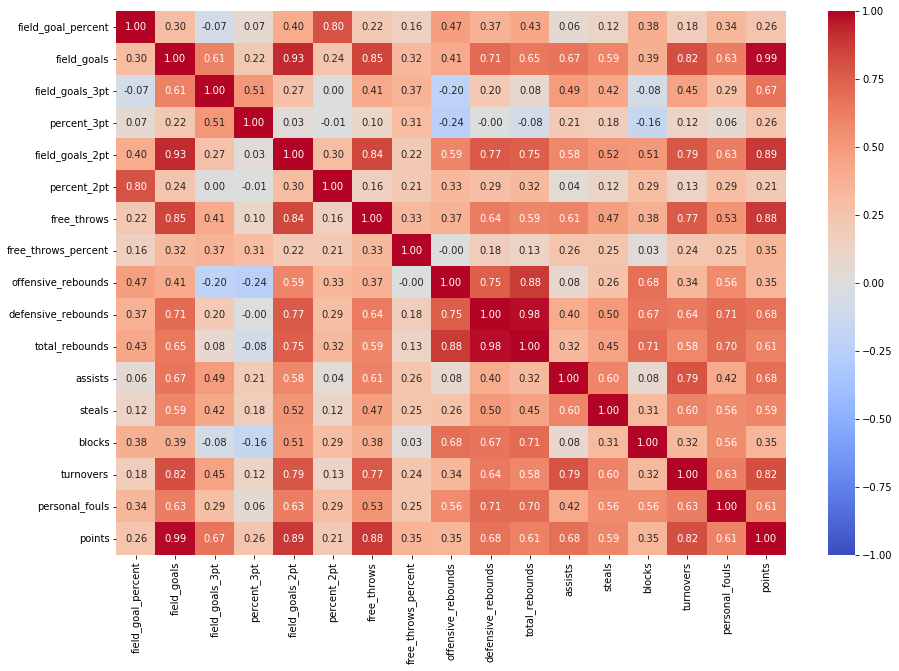

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter for numeric columns
numeric_df = nba_player_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Identify Key Factors
key_factors = ['field_goal_percent', 'field_goals', 'field_goals_3pt', 'percent_3pt', 'field_goals_2pt', 'percent_2pt', 
               'free_throws', 'free_throws_percent', 'offensive_rebounds', 'defensive_rebounds', 'total_rebounds', 
               'assists', 'steals', 'blocks', 'turnovers', 'personal_fouls', 'points']

# Calculate the correlation matrix for the key factors
key_factors_corr_matrix = nba_player_df[key_factors].corr()

# Display the plot
plt.figure(figsize=(15, 10))
sns.heatmap(key_factors_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

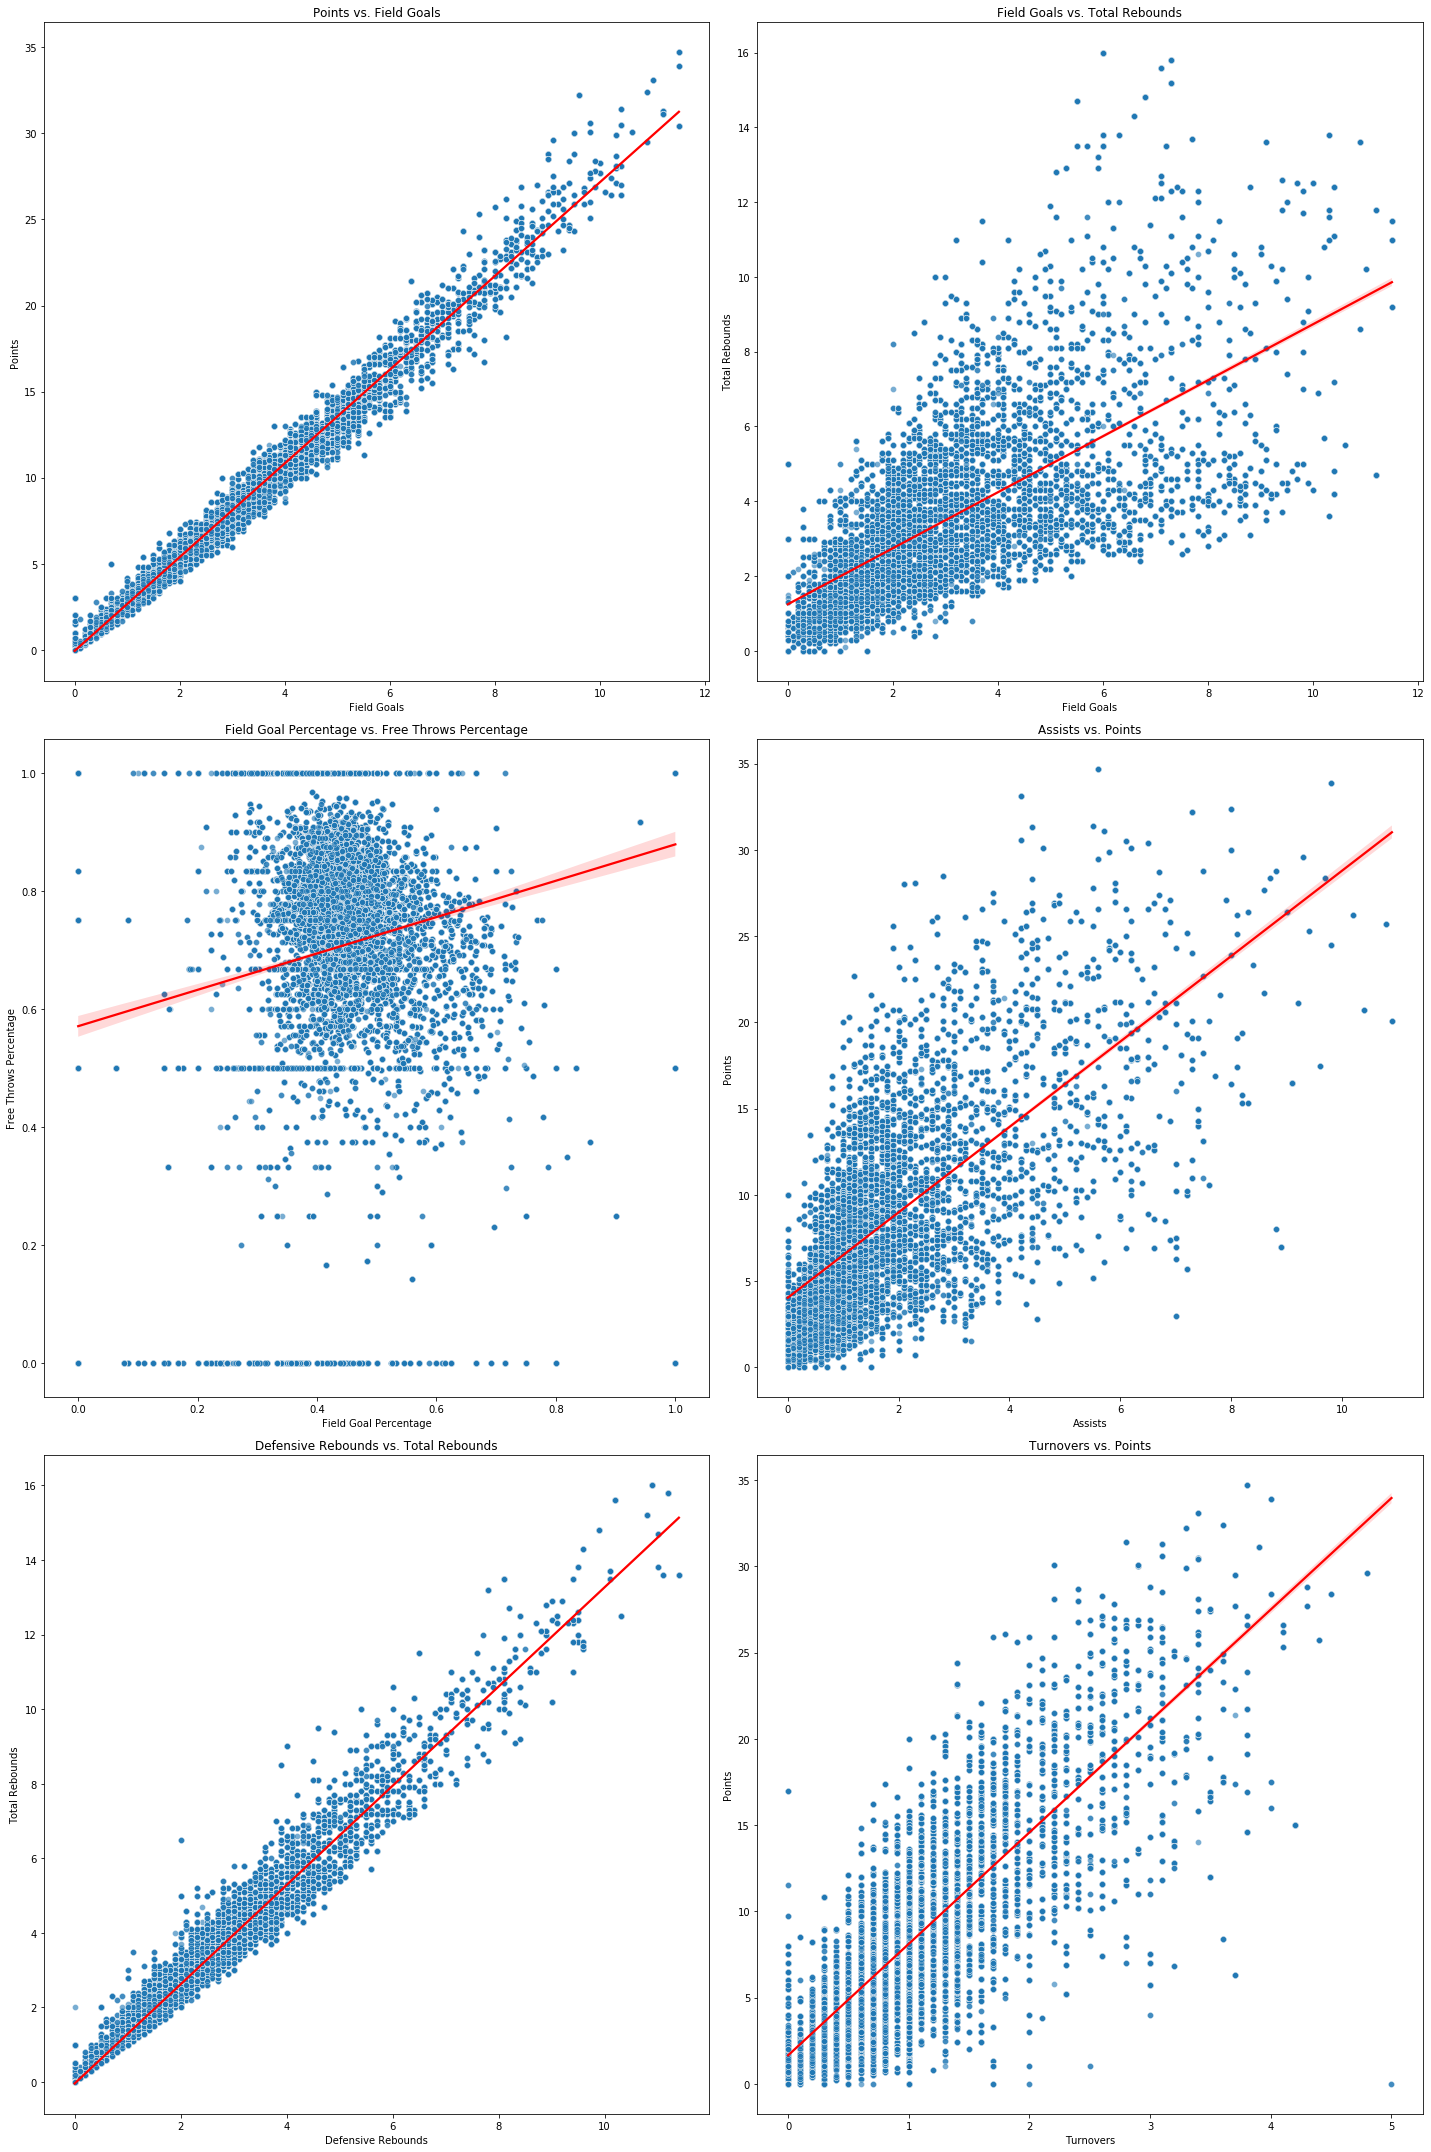

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
fig, axes = plt.subplots(3, 2, figsize=(20, 30))

# Points vs. Field Goals
sns.scatterplot(x='field_goals', y='points', data=nba_player_df, ax=axes[0, 0], alpha=0.6)
sns.regplot(x='field_goals', y='points', data=nba_player_df, ax=axes[0, 0], scatter=False, color='red')
axes[0, 0].set_title('Points vs. Field Goals')
axes[0, 0].set_xlabel('Field Goals')
axes[0, 0].set_ylabel('Points')

# Field Goals vs. Total Rebounds
sns.scatterplot(x='field_goals', y='total_rebounds', data=nba_player_df, ax=axes[0, 1], alpha=0.6)
sns.regplot(x='field_goals', y='total_rebounds', data=nba_player_df, ax=axes[0, 1], scatter=False, color='red')
axes[0, 1].set_title('Field Goals vs. Total Rebounds')
axes[0, 1].set_xlabel('Field Goals')
axes[0, 1].set_ylabel('Total Rebounds')

# Field Goal Percentage vs. Free Throws Percentage
sns.scatterplot(x='field_goal_percent', y='free_throws_percent', data=nba_player_df, ax=axes[1, 0], alpha=0.6)
sns.regplot(x='field_goal_percent', y='free_throws_percent', data=nba_player_df, ax=axes[1, 0], scatter=False, color='red')
axes[1, 0].set_title('Field Goal Percentage vs. Free Throws Percentage')
axes[1, 0].set_xlabel('Field Goal Percentage')
axes[1, 0].set_ylabel('Free Throws Percentage')

# Assists vs. Points
sns.scatterplot(x='assists', y='points', data=nba_player_df, ax=axes[1, 1], alpha=0.6)
sns.regplot(x='assists', y='points', data=nba_player_df, ax=axes[1, 1], scatter=False, color='red')
axes[1, 1].set_title('Assists vs. Points')
axes[1, 1].set_xlabel('Assists')
axes[1, 1].set_ylabel('Points')

# Defensive Rebounds vs. Total Rebounds
sns.scatterplot(x='defensive_rebounds', y='total_rebounds', data=nba_player_df, ax=axes[2, 0], alpha=0.6)
sns.regplot(x='defensive_rebounds', y='total_rebounds', data=nba_player_df, ax=axes[2, 0], scatter=False, color='red')
axes[2, 0].set_title('Defensive Rebounds vs. Total Rebounds')
axes[2, 0].set_xlabel('Defensive Rebounds')
axes[2, 0].set_ylabel('Total Rebounds')

# Turnovers vs. Points
sns.scatterplot(x='turnovers', y='points', data=nba_player_df, ax=axes[2, 1], alpha=0.6)
sns.regplot(x='turnovers', y='points', data=nba_player_df, ax=axes[2, 1], scatter=False, color='red')
axes[2, 1].set_title('Turnovers vs. Points')
axes[2, 1].set_xlabel('Turnovers')
axes[2, 1].set_ylabel('Points')

# Adjust layout
plt.tight_layout()
plt.show()


TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

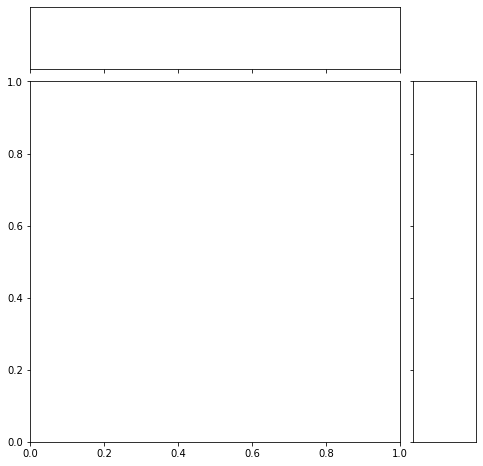

In [ ]:
import seaborn as sns

# Points vs. Field Goals
sns.jointplot(x='field_goals', y='points', data=nba_player_df, kind='reg', height=8)

# Field Goals vs. Total Rebounds
sns.jointplot(x='field_goals', y='total_rebounds', data=nba_player_df, kind='reg', height=8)

# Field Goal Percentage vs. Free Throws Percentage
sns.jointplot(x='field_goal_percent', y='free_throws_percent', data=nba_player_df, kind='reg', height=8)

# Assists vs. Points
sns.jointplot(x='assists', y='points', data=nba_player_df, kind='reg', height=8)

# Defensive Rebounds vs. Total Rebounds
sns.jointplot(x='defensive_rebounds', y='total_rebounds', data=nba_player_df, kind='reg', height=8)

# Turnovers vs. Points
sns.jointplot(x='turnovers', y='points', data=nba_player_df, kind='reg', height=8)

plt.show()

In [ ]:
sns.pairplot(nba_player_df[['field_goals', 'points', 'total_rebounds', 'field_goal_percent', 'free_throws_percent', 'assists', 'defensive_rebounds', 'turnovers']], kind='reg')
plt.show()

In [ ]:
# field_goals, points, and total_rebounds have right-skewed distributions, while variables like free_throws_percent and field_goal_percent have distributions with distinct clustering or gaps.
# Points vs. Field Goals: There is a strong positive correlation, indicating that players who score more field goals tend to have higher points.
# Total Rebounds vs. Field Goals: There is a moderate positive correlation, suggesting that players with more field goals also tend to have more total rebounds
# Free Throws Percent vs. Field Goals: The relationship seems weaker, indicating that field goals may not directly predict free throw percentage.
# Assists vs. Points: There is a moderate positive correlation, suggesting players who assist more also tend to score more points.
# Strong Correlations: Points and Field Goals Total Rebounds/ Points and Assists
# Potential Data Transformations:Right-skewed distributions (e.g., points, total rebounds) might benefit from transformations (e.g., log transformation) to achieve normality.


In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define a function to create QQ plots for multiple columns
def qq_plot(data, columns):
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(columns, 1):
        plt.subplot(3, 3, i)
        sm.qqplot(data[col].dropna(), line='s', ax=plt.gca())
        plt.title(f'QQ Plot of {col}')
    plt.tight_layout()
    plt.show()

# List of columns to generate QQ plots for
columns = ['field_goals', 'points', 'total_rebounds', 'field_goal_percent', 'free_throws_percent', 'assists', 'defensive_rebounds', 'turnovers']

# Generate QQ plots
qq_plot(nba_player_df, columns)


In [ ]:
# Field Goals, Points, Total Rebounds, Assists, Defensive Rebounds: The points show a pronounced curve, indicating that these variables are not normally distributed and have heavier tails than the normal distribution.
# Field Goal Percentage, Free Throws Percentage: The points deviate from the reference line, suggesting that these percentages are not normally distributed and show significant skewness and/or heavy tails.
# Turnovers: Similar to other performance metrics, turnovers also deviate from the reference line, indicating non-normality.

In [ ]:
# Implications
# Data Transformation: Since many of variables are not normally distributed, might consider data transformations (e.g., log transformation, Box-Cox transformation) to achieve normality, which can be beneficial for certain statistical analyses and models.
# Robust Methods: If transformation is not feasible or does not achieve normality, consider using robust statistical methods that do not assume normality.
# Model Selection: Some machine learning algorithms (e.g., tree-based methods like Random Forests and Gradient Boosting) do not assume normality and can handle skewed distributions well.

## Feature Engineering

In [ ]:
nba_player_df.columns

Index(['player_id', 'season_id', 'season', 'player_name', 'position', 'age',
       'experience', 'league', 'team', 'games_played', 'games_started',
       'mins_per_game', 'field_goals', 'field_goals_attempt',
       'field_goal_percent', 'field_goals_3pt', 'attempts_3pt', 'percent_3pt',
       'field_goals_2pt', 'attempts_2pt', 'percent_2pt',
       'effective_field_goal_percent', 'free_throws', 'free_throws_attempt',
       'free_throws_percent', 'offensive_rebounds', 'defensive_rebounds',
       'total_rebounds', 'assists', 'steals', 'blocks', 'turnovers',
       'personal_fouls', 'points', 'average_shot_distance',
       'field_goal_attempts_percent_2pt_range',
       'field_goal_attempts_percent_3pt_range', 'field_goal_percent_2pt_range',
       'field_goal_percent_3pt_range', 'field_goal_assist_percent_2pt_range',
       'field_goal_assist_percent_3pt_range',
       'field_goal_attempts_dunk_percent', 'num_of_dunks',
       'corner_3pt_percent', 'num_heaves_attempted', 'num_heav

In [ ]:
num_players = len(nba_player_df['player_name'].unique())
print(f'Number of players: {num_players}')

Number of players: 1148


In [ ]:
nba_player_df['position'].unique()

array(['SG', 'C', 'PF', 'PG-SG', 'PG', 'SF', 'SF-SG', 'PF-SF', 'SF-PF',
       'SG-SF', 'SG-PG', 'C-PF', 'PF-C', 'SG-PG-SF'], dtype=object)

In [ ]:
nba_player_df['personal_fouls'].unique()

array([1.1, 1.2, 0.2, 1.6, 0.6, 1.5, 1.8, 1.7, 2.6, 2.5, 3. , 3.2, 2.8,
       3.8, 3.5, 3.6, 3.1, 3.4, 2.9, 2.4, 1.4, 1.3, 2. , 2.3, 2.1, 2.2,
       0.9, 1.9, 2.7, 0.8, 0.4, 0.7, 1. , 0. , 0.3, 0.5, 3.3, 4. , 0.1,
       3.7, 4.9, 4.1, 5. ])

In [ ]:
nba_player_df['position'].value_counts()

SG          9369
C           7760
SF          7720
PF          6956
PG          6637
SF-SG        135
PF-SF        105
PG-SG         91
SF-PF         88
C-PF          77
SG-PG         67
PF-C          63
SG-SF         58
SG-PG-SF       9
Name: position, dtype: int64

In [ ]:
# Output Columns: Career Longevity (Short/Long Career) and Player Performance (Under/OverPerformed Players): Performance value of player
# Input Columns: player_name, season, league, team, games_played, mins_per_game, points, conversion_rate (based on point range scored/attempts), num_seasons, assists

In [ ]:
nba_player_df.columns

Index(['player_id', 'season_id', 'season', 'player_name', 'position', 'age',
       'experience', 'league', 'team', 'games_played', 'games_started',
       'mins_per_game', 'field_goals', 'field_goals_attempt',
       'field_goal_percent', 'field_goals_3pt', 'attempts_3pt', 'percent_3pt',
       'field_goals_2pt', 'attempts_2pt', 'percent_2pt',
       'effective_field_goal_percent', 'free_throws', 'free_throws_attempt',
       'free_throws_percent', 'offensive_rebounds', 'defensive_rebounds',
       'total_rebounds', 'assists', 'steals', 'blocks', 'turnovers',
       'personal_fouls', 'points', 'average_shot_distance',
       'field_goal_attempts_percent_2pt_range',
       'field_goal_attempts_percent_3pt_range', 'field_goal_percent_2pt_range',
       'field_goal_percent_3pt_range', 'field_goal_assist_percent_2pt_range',
       'field_goal_assist_percent_3pt_range',
       'field_goal_attempts_dunk_percent', 'num_of_dunks',
       'corner_3pt_percent', 'num_heaves_attempted', 'num_heav

In [ ]:
nba_player_df

,player_id,season_id,season,player_name,position,age,experience,league,team,games_played,...,field_goal_assist_percent_3pt_range,field_goal_attempts_dunk_percent,num_of_dunks,corner_3pt_percent,num_heaves_attempted,num_heaves_made,hall_of_fame_status,num_seasons,first_season,last_season
170063,4063,25110,2015,Alexey Shved,SG,26.0,3,NBA,TOT,42,...,0.681,0.012,4.0,0.333,3.0,0.0,False,3,2013,2015
170064,4063,25110,2015,Alexey Shved,SG,26.0,3,NBA,TOT,42,...,0.647,0.015,2.0,0.400,2.0,0.0,False,3,2013,2015
170065,4063,25110,2015,Alexey Shved,SG,26.0,3,NBA,TOT,42,...,1.000,0.042,1.0,1.000,0.0,0.0,False,3,2013,2015
170066,4063,25110,2015,Alexey Shved,SG,26.0,3,NBA,TOT,42,...,0.654,0.006,1.0,0.000,1.0,0.0,False,3,2013,2015
170067,4063,25110,2015,Alexey Shved,SG,26.0,3,NBA,TOT,42,...,0.633,0.030,7.0,0.385,1.0,0.0,False,3,2013,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209193,5208,31848,2024,Vasilije Micić,PG,30.0,1,NBA,OKC,30,...,0.531,0.000,0.0,0.286,0.0,0.0,False,1,2024,2024
209194,5208,31849,2024,Vasilije Micić,PG,30.0,1,NBA,CHO,30,...,0.605,0.003,1.0,0.154,0.0,0.0,False,1,2024,2024
209195,5208,31849,2024,Vasilije Micić,PG,30.0,1,NBA,CHO,30,...,0.818,0.011,1.0,0.000,0.0,0.0,False,1,2024,2024
209196,5208,31849,2024,Vasilije Micić,PG,30.0,1,NBA,CHO,30,...,0.531,0.000,0.0,0.286,0.0,0.0,False,1,2024,2024


In [ ]:
nba_player_df[['player_id', 'player_name', 'points','team', 'mins_per_game']]

,player_id,player_name,points,team,mins_per_game
170063,4063,Alexey Shved,10.3,TOT,18.3
170064,4063,Alexey Shved,10.3,TOT,18.3
170065,4063,Alexey Shved,10.3,TOT,18.3
170066,4063,Alexey Shved,10.3,TOT,18.3
170067,4063,Alexey Shved,10.3,TOT,18.3
...,...,...,...,...,...
209193,5208,Vasilije Micić,3.3,OKC,12.0
209194,5208,Vasilije Micić,10.8,CHO,27.2
209195,5208,Vasilije Micić,10.8,CHO,27.2
209196,5208,Vasilije Micić,10.8,CHO,27.2


In [ ]:
points_mean = nba_player_df.groupby('player_id')['points'].mean().to_dict()
nba_player_df['player_points'] = nba_player_df['player_id'].map(points_mean)

mins_mean = nba_player_df.groupby('player_id')['mins_per_game'].mean().to_dict()
nba_player_df['player_game_time'] = nba_player_df['player_id'].map(mins_mean)

nba_player_df['points_mins_ratio'] = nba_player_df['player_points'] / nba_player_df['player_game_time']

In [ ]:
nba_player_df['points_mins_ratio'] = nba_player_df['points_mins_ratio'].apply(lambda x: round(x, 2))

nba_player_df[['player_id', 'player_name', 'points','mins_per_game', 'player_points', 'player_game_time', 'points_mins_ratio']]

,player_id,player_name,points,mins_per_game,player_points,player_game_time,points_mins_ratio
170063,4063,Alexey Shved,10.3,18.3,8.466667,17.083333,0.50
170064,4063,Alexey Shved,10.3,18.3,8.466667,17.083333,0.50
170065,4063,Alexey Shved,10.3,18.3,8.466667,17.083333,0.50
170066,4063,Alexey Shved,10.3,18.3,8.466667,17.083333,0.50
170067,4063,Alexey Shved,10.3,18.3,8.466667,17.083333,0.50
...,...,...,...,...,...,...,...
209193,5208,Vasilije Micić,3.3,12.0,7.033333,19.600000,0.36
209194,5208,Vasilije Micić,10.8,27.2,7.033333,19.600000,0.36
209195,5208,Vasilije Micić,10.8,27.2,7.033333,19.600000,0.36
209196,5208,Vasilije Micić,10.8,27.2,7.033333,19.600000,0.36


In [ ]:
nba_grouped_df = (nba_player_df.groupby('player_id').agg({'steals': 'mean', 'blocks': 'mean', 'turnovers': 'mean'}).reset_index())

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(nba_grouped_df[['steals', 'blocks', 'turnovers']])

In [ ]:
scaled_df = pd.DataFrame(scaled_data, columns=['scaled_steals', 'scaled_blocks', 'scaled_turnovers'])

grouped_df = pd.concat([nba_grouped_df[['player_id']], scaled_df], axis=1)

weight_steals = 0.4
weight_blocks = 0.4
weight_turnovers = -0.2

# Calculate the defense metric 
grouped_df['defensive_metric'] = (grouped_df['scaled_steals'] * weight_steals + grouped_df['scaled_blocks'] * weight_blocks + grouped_df['scaled_turnovers'] * weight_turnovers)

In [ ]:
grouped_df

,player_id,scaled_steals,scaled_blocks,scaled_turnovers,defensive_metric
0,4063,0.370370,0.055556,0.281746,0.114021
1,4064,0.805898,0.350309,0.502646,0.361954
2,4065,0.194004,0.071429,0.153061,0.075561
3,4066,0.823045,0.629630,0.476190,0.485832
4,4067,0.339506,0.069444,0.119048,0.139771
...,...,...,...,...,...
1142,5205,0.246914,0.305556,0.166667,0.187654
1143,5206,0.205761,0.212963,0.261905,0.115109
1144,5207,0.308642,0.194444,0.238095,0.153616
1145,5208,0.308642,0.027778,0.396825,0.055203


In [ ]:
nba_player_df = pd.merge(nba_player_df, grouped_df[['player_id', 'defensive_metric']], on='player_id', how='left')

In [ ]:
nba_player_df[['steals', 'blocks', 'turnovers', 'defensive_metric']]

,steals,blocks,turnovers,defensive_metric
0,0.7,0.1,1.1,0.114021
1,0.7,0.1,1.1,0.114021
2,0.7,0.1,1.1,0.114021
3,0.7,0.1,1.1,0.114021
4,0.7,0.1,1.1,0.114021
...,...,...,...,...
39130,0.3,0.1,1.0,0.055203
39131,0.7,0.1,2.3,0.055203
39132,0.7,0.1,2.3,0.055203
39133,0.7,0.1,2.3,0.055203


In [ ]:
nba_player_df['defensive_metric'] = nba_player_df['defensive_metric'].apply(lambda x: round(x, 2))

In [ ]:
nba_player_df[['player_id', 'points_mins_ratio', 'total_rebounds', 'defensive_metric']]

,player_id,points_mins_ratio,total_rebounds,defensive_metric
0,4063,0.50,2.4,0.11
1,4063,0.50,2.4,0.11
2,4063,0.50,2.4,0.11
3,4063,0.50,2.4,0.11
4,4063,0.50,2.4,0.11
...,...,...,...,...
39130,5208,0.36,0.8,0.06
39131,5208,0.36,2.1,0.06
39132,5208,0.36,2.1,0.06
39133,5208,0.36,2.1,0.06


In [ ]:
min_point = nba_player_df['points_mins_ratio'].min()
max_point = nba_player_df['points_mins_ratio'].max()

min_rebound = nba_player_df['total_rebounds'].min()
max_rebound = nba_player_df['total_rebounds'].max()

min_defensive = nba_player_df['defensive_metric'].min()
max_defensive = nba_player_df['defensive_metric'].max()

print(f'Min value points_mins_ratio: {min_point}, Max value points_mins_ratio: {max_point}')
print(f'Min value total rebounds: {min_rebound}, Max value total rebounds: {max_rebound}')
print(f'Min value defensive metric: {min_defensive}, Max value defensive metric: {max_defensive}')

Min value points_mins_ratio: 0.0, Max value points_mins_ratio: 2.0
Min value total rebounds: 0.0, Max value total rebounds: 16.0
Min value defensive metric: -0.08, Max value defensive metric: 0.52


In [ ]:
# Normalizing the data based on a scale from 0-1 and then multiply by their weights to get player rating

weight_points = 0.45
weight_rebound = 0.2
weight_defensive = 0.35

nba_player_df['norm_points_mins_ratio'] = ((nba_player_df['points_mins_ratio'] - min_point) / (max_point - min_point))
nba_player_df['norm_rebounds'] = ((nba_player_df['total_rebounds'] - min_rebound) / (max_rebound - min_rebound))
nba_player_df['norm_defensive_metric'] = ((nba_player_df['defensive_metric'] - min_defensive) / (max_defensive - min_defensive))

In [ ]:
nba_player_df['norm_points_mins_ratio'] = nba_player_df['norm_points_mins_ratio'].apply(lambda x: round(x, 2))
nba_player_df['norm_rebounds'] = nba_player_df['norm_rebounds'].apply(lambda x: round(x, 2))
nba_player_df['norm_defensive_metric'] = nba_player_df['norm_defensive_metric'].apply(lambda x: round(x, 2))

# Get a player rating scale between 1-5
nba_player_df['player_rating'] = ((nba_player_df['norm_points_mins_ratio'] * weight_points) + (nba_player_df['norm_rebounds'] * weight_rebound) +
                                (nba_player_df['norm_defensive_metric'] * weight_defensive)) * 5


In [ ]:
nba_player_df[['norm_points_mins_ratio', 'norm_rebounds', 'norm_defensive_metric', 'player_rating']]

,norm_points_mins_ratio,norm_rebounds,norm_defensive_metric,player_rating
0,0.25,0.15,0.32,1.2725
1,0.25,0.15,0.32,1.2725
2,0.25,0.15,0.32,1.2725
3,0.25,0.15,0.32,1.2725
4,0.25,0.15,0.32,1.2725
...,...,...,...,...
39130,0.18,0.05,0.23,0.8575
39131,0.18,0.13,0.23,0.9375
39132,0.18,0.13,0.23,0.9375
39133,0.18,0.13,0.23,0.9375


In [ ]:
nba_player_df['player_rating'].describe()

count    39135.000000
mean         1.360888
std          0.396207
min          0.087500
25%          1.077500
50%          1.312500
75%          1.575000
max          3.240000
Name: player_rating, dtype: float64

In [ ]:
range_rating = nba_player_df['player_rating'].quantile([0.4, 0.5, 0.6, 0.7, 0.8])
print(range_rating)

0.4    1.2200
0.5    1.3125
0.6    1.4125
0.7    1.5270
0.8    1.6400
Name: player_rating, dtype: float64


In [ ]:
# Considering 70 quantile value of player_rating as a threshold
# 70 quantile value: 1.5270

nba_player_df['player_performance_metric'] = nba_player_df['player_rating'].apply(lambda x: 1 if x >= 1.5270 else 0)

In [ ]:
nba_player_df['player_performance'] = nba_player_df['player_performance_metric'].apply(lambda x: 'High Performance' if x == 1 else 'Low Performance')

In [ ]:
nba_player_df[['player_performance_metric', 'player_performance']].sort_values(by = 'player_performance_metric')

,player_performance_metric,player_performance
0,0,Low Performance
25148,0,Low Performance
25147,0,Low Performance
25146,0,Low Performance
25145,0,Low Performance
...,...,...
26359,1,High Performance
26360,1,High Performance
26361,1,High Performance
26348,1,High Performance


In [ ]:
print(nba_player_df['player_performance'].value_counts())

Low Performance     27394
High Performance    11741
Name: player_performance, dtype: int64


## Data Modelling

In [ ]:
# Input Variables: 'position', 'age', 'experience', 'games_played', 'games_started', 'personal_fouls', 'average_shot_distance', 'num_seasons'

# Output Variables: 
# player_performance: Points_min_ratio('points'/'mins_per_game'), Rebounds('total_rebounds'), Defence (steals, blocks, turnovers)

In [ ]:
# One-hot encoding for the position column
encoded_position = pd.get_dummies(nba_player_df['position'], prefix='position')

nba_player_df = pd.concat([nba_player_df, encoded_position], axis=1)

In [ ]:
nba_player_df.columns

Index(['player_id', 'season_id', 'season', 'player_name', 'position', 'age',
       'experience', 'league', 'team', 'games_played', 'games_started',
       'mins_per_game', 'field_goals', 'field_goals_attempt',
       'field_goal_percent', 'field_goals_3pt', 'attempts_3pt', 'percent_3pt',
       'field_goals_2pt', 'attempts_2pt', 'percent_2pt',
       'effective_field_goal_percent', 'free_throws', 'free_throws_attempt',
       'free_throws_percent', 'offensive_rebounds', 'defensive_rebounds',
       'total_rebounds', 'assists', 'steals', 'blocks', 'turnovers',
       'personal_fouls', 'points', 'average_shot_distance',
       'field_goal_attempts_percent_2pt_range',
       'field_goal_attempts_percent_3pt_range', 'field_goal_percent_2pt_range',
       'field_goal_percent_3pt_range', 'field_goal_assist_percent_2pt_range',
       'field_goal_assist_percent_3pt_range',
       'field_goal_attempts_dunk_percent', 'num_of_dunks',
       'corner_3pt_percent', 'num_heaves_attempted', 'num_heav

In [ ]:
model_df = nba_player_df.groupby('player_id').agg({
    'position_C' : 'max', 
    'position_C-PF' : 'max', 
    'position_PF' : 'max',
    'position_PF-C' : 'max', 
    'position_PF-SF' : 'max', 
    'position_PG': 'max', 
    'position_PG-SG' : 'max',
    'position_SF' : 'max', 
    'position_SF-PF' : 'max', 
    'position_SF-SG' : 'max', 
    'position_SG' : 'max',
    'position_SG-PG' : 'max', 
    'position_SG-PG-SF' : 'max', 
    'position_SG-SF' : 'max',  
    'age': 'mean', 
    'experience': 'mean',
    'games_played': 'mean',
    'games_started': 'mean',  
    'personal_fouls': 'mean',
    'average_shot_distance': 'mean',
    'num_seasons': 'mean',
    'player_rating': 'mean'
})

# Reset index to convert the groupby object back to a DataFrame
model_df.reset_index(inplace=True)

# Split data into input and output variables

X = model_df[['position_C', 'position_C-PF', 'position_PF', 'position_PF-C', 'position_PF-SF', 'position_PG', 'position_PG-SG',
       'position_SF', 'position_SF-PF', 'position_SF-SG', 'position_SG', 'position_SG-PG', 'position_SG-PG-SF', 'position_SG-SF', 
       'age', 'experience', 'games_played', 'games_started', 'personal_fouls', 'average_shot_distance', 'num_seasons']]

y =  model_df['player_rating']

In [ ]:
# Training and Testing the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear Regression Model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predictions
y_pred = lin_model.predict(X_test)

In [ ]:
# Model Evaluation
mse_score = mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
mae_score = mean_absolute_error(y_test, y_pred)
rmse_score = mean_squared_error(y_test, y_pred, squared=False)

print(f'Mean Squared Error: {mse_score}')
print(f'R-squared score: {r2_score}')
print(f'Mean Absolute score: {mae_score}')
print(f'Root Mean Squared score: {rmse_score}')

Mean Squared Error: 0.051572109634386964
R-squared score: 0.5001735059163437
Mean Absolute score: 0.14475160459398106
Root Mean Squared score: 0.2270949352900389


In [ ]:
# Comparing Predicted and original dataframe Values
for orgin_val, pred_val in zip(y_test, y_pred):
    print(f'Original Value: {orgin_val}, Predicted Value: {pred_val}')

Original Value: 0.6923076923076923, Predicted Value: 0.2001891862105933
Original Value: 0.0, Predicted Value: -0.03486705521198902
Original Value: 0.0, Predicted Value: 0.005421330775948696
Original Value: 0.0, Predicted Value: -0.12895035366619062
Original Value: 0.0, Predicted Value: -0.03916887955955034
Original Value: 0.0, Predicted Value: 0.11577203610494866
Original Value: 0.25, Predicted Value: 0.5959308197936362
Original Value: 0.0, Predicted Value: -0.09357382365580957
Original Value: 0.0, Predicted Value: 0.5182411360992254
Original Value: 0.0, Predicted Value: 0.15988572682695407
Original Value: 0.0, Predicted Value: 0.2020318971947921
Original Value: 0.0, Predicted Value: 0.10561153370851303
Original Value: 0.0, Predicted Value: 0.05411269291015419
Original Value: 1.0, Predicted Value: 0.768575339192525
Original Value: 0.0, Predicted Value: 0.012411388132817086
Original Value: 0.0, Predicted Value: -0.08271588722560225
Original Value: 0.9166666666666666, Predicted Value: 0.

In [ ]:
## Convert 'age', 'experience', 'games_played', 'games_started', 'personal_fouls', 'average_shot_distance', 'num_seasons' to binary values for classificatiion
## Use player_performance_metric as an output variable 
## Test for Classification models

In [ ]:
##  Check Classification Models